# Week 4. NumPy Basics: Arrays and Vectorized Computation

- **Reference**: Chapter 4, Appendix A2, and A3, Python for Data Analysis, third edition. <br>
<br>
- NumPy (**Numerical Python**) is one of the most important packages for numerical computing in Python. <br>
 * Many Python packages, such as `statsmodels`, rely on NumPy. 
 * ndarray in NumPy is the fundamental Python object in matrix operations. <br>
<br>
- **Today's Schedule:**
 * Fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and etc.
 * Common array algorithms like sorting, unique, and set operations.
 * Efficient descriptive statistics and aggregating/summarizing data.
 * Data alignment and relational data manipulations for merging and joining together heterogeneous datasets.
 * Expressing conditional logic as array expressions instead of loops with if-elif-else branches.
 * Group-wise data manipulations (aggregation, transformation, function application). <br>
<br>
- **Why is NumPy so important?**
 * It is designed for efficiency on **large** arrays of data.

In [1]:
import numpy as np
import timeit 
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

To give you an idea of the performance difference, consider a **NumPy array** of one million integers, and the equivalent Python **list**:

In [2]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%timeit my_arr2 = my_arr * 2

172 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [4]:
%timeit my_list2 = [x * 2 for x in my_list]

28.4 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- Leason: NumPy-based algorithms are generally **10 to 100** times faster than their pure Python counterparts and use significantly less memory.
 * There is a GPU-version NumPy, the **JAX** package, that operates in a similar way to NumPy but runs **50 to 100** times faster than NumPy in large datasets.  

## 4.1 The NumPy ndarray: A Multidimensional Array Object

In [5]:
# Generate some random data
data = np.random.randn(2, 3)
print(data)

[[-0.2047  0.4789 -0.5194]
 [-0.5557  1.9658  1.3934]]


In [6]:
print(data * 10)
print(data + data)

[[-2.0471  4.7894 -5.1944]
 [-5.5573 19.6578 13.9341]]
[[-0.4094  0.9579 -1.0389]
 [-1.1115  3.9316  2.7868]]


An ndarray is a generic multidimensional container for homogeneous data: All of the elements must be the **"same type"**.

In [7]:
print(data.shape)   # the size of each dimension
print(data.dtype)   # the data type of data in np.array

(2, 3)
float64


### 4.1.1 Creating ndarrays

The easiest way to create an array is to use the array function, which accepts any **sequence-like** object.

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)

[6.  7.5 8.  0.  1. ]


**Nested** sequences will be converted into a multidimensional array:

In [9]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)

[[1 2 3 4]
 [5 6 7 8]]


In [10]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


In [11]:
print(arr1.dtype)
print(arr2.dtype)

float64
int64


In addition to ```np.array```, there are a number of other functions for creating new arrays, e.g., arrays collecting zeros, ones, or even empty arrays.
* It’s not safe to assume that np.empty will return an array of all zeros. In some cases, it may return uninitialized “garbage” values.

In [12]:
print(np.zeros(10))
print(np.zeros((3, 6)))
print(np.ones((3, 2)))

# empty creates an array without initializing its values to any particular value.
print(np.empty((2, 3, 2)))  # you can see it has arbitrary "garbage" values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


```np.arange``` is an array-valued version of the built-in Python ```range``` function:

In [13]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 4.1.2 Data Types for ndarrays

In [14]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


* The numerical dtypes are named the same way: a type name, like ```float``` or ```int```, followed by a number indicating the number of bits per element. 
 * A standard double-precision floating-point value (what’s used under the hood in Python’s float object) takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as ```float64```.   <br>
<br>
* Don’t worry about memorizing the NumPy dtypes, especially if you’re a new user.
 * When you need more control over how large datasets are stored in memory and on disk, it is good to know you have control over the storage type.

You can explicitly convert or cast an array from one dtype to another using ndarray’s ```astype``` method.
* Calling ```astype``` always creates a new array, even if the new dtype is the same as the old dtype.

In [15]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int64
float64


If we cast some floating-point numbers to be of integer dtype, the decimal part will be truncated:

In [16]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.astype(np.int32))   # the decimal part will be truncated:

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]


If you have an array of strings representing numbers, you can use ```astype``` to convert them to numeric form.
* It’s important to be cautious when using the ```np.string_``` type, as string data in NumPy is fixed size and may truncate input without warning. 

In [17]:
numeric_strings = np.array(['1.25', '-9.623', '42.123455'], dtype=np.string_)
print(numeric_strings.astype(np.float64))

[ 1.25   -9.623  42.1235]


In [18]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### 4.1.3 Arithmetic with NumPy Arrays
#### Vectorization

We can execute batch operations on data without writing any for loops (which are slow in most cases). 

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)   # elementwise product
print(arr - arr)   # elementwise deduction

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [20]:
print(1 / arr)
print(arr ** 0.5)

[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]]
[[1.     1.4142 1.7321]
 [2.     2.2361 2.4495]]


Comparisons between arrays **of the same size** yield boolean arrays.
* Operations between differently sized arrays is called **broadcasting** (discussed later). 

In [21]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2)
print(arr2 > arr)

[[ 0.  4.  1.]
 [ 7.  2. 12.]]
[[False  True False]
 [ True False  True]]


### 4.1.4 Basic Indexing and Slicing

One-dimensional arrays act similarly to Python lists:

In [22]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]


In [23]:
arr[5:8] = 12  # here we assign a new scalar value to a slice (an example of broadcasting)
print(arr)     # np.array is mutable

[ 0  1  2  3  4 12 12 12  8  9]


In [24]:
arr_slice = arr[5:8]
print(arr_slice)

[12 12 12]


In [25]:
arr_slice[:] = 64
print(arr_slice)

[64 64 64]


In [26]:
print(arr)   # similar to the mutability of built-in type "list"

[ 0  1  2  3  4 64 64 64  8  9]


If you want a copy of a slice of an ndarray, you will need to explicitly copy the array. For example, ```arr[5:8].copy()```.

In [27]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


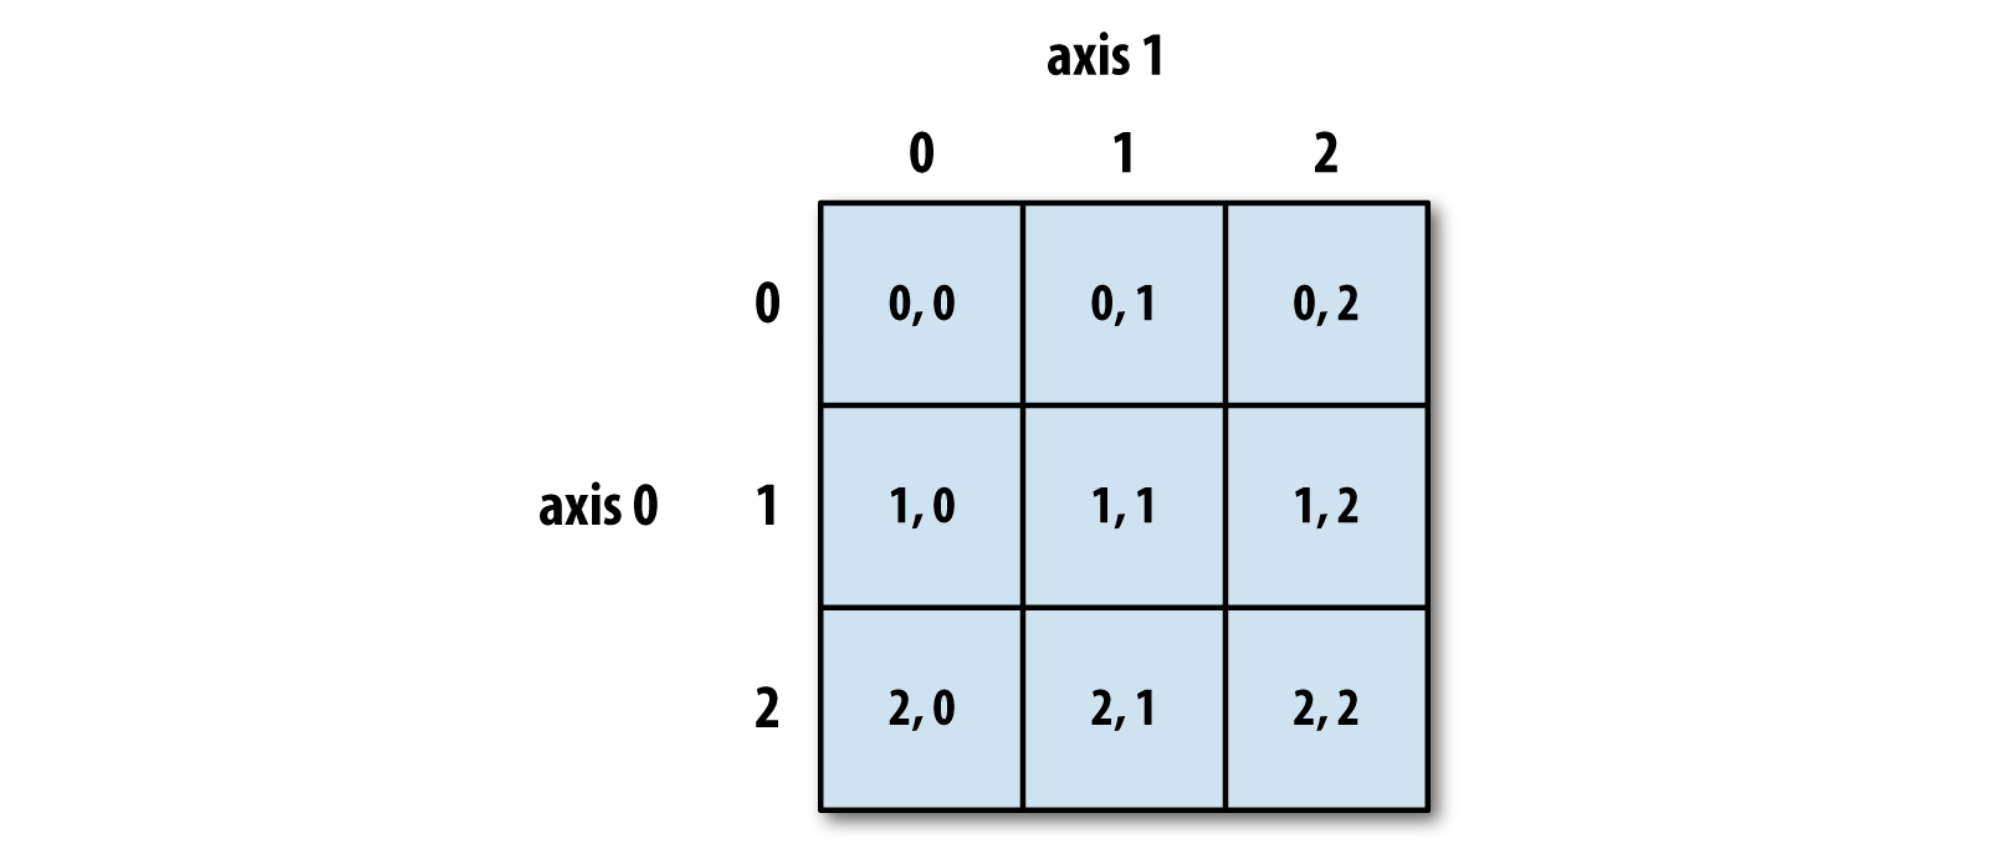

In [28]:
print(arr2d[2])   # In multidimensional arrays, if you omit later indices, the returned object will be a 
                  # lower dimensional ndarray consisting of all the data along the higher dimensions.
    
## It is equivalent to 
print(arr2d[2,:])

[7 8 9]
[7 8 9]


In [29]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In [30]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [31]:
print(arr3d[0])

[[1 2 3]
 [4 5 6]]


In [32]:
print(arr3d[0,:])
print(arr3d[0,:,:])

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


Both scalar values and arrays can be assigned to ```arr3d[0]```. 

In [33]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]


In [34]:
arr3d[0] = old_values
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [35]:
print(arr3d[1, 0])
print(arr3d[1][0])

[7 8 9]
[7 8 9]


In [36]:
x = arr3d[1]
x
x[0]

array([7, 8, 9])

#### Indexing with slices

In [37]:
print(arr)
print(arr[1:6])

[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


In [38]:
print(arr2d)
print("----------")
print(arr2d[:2])
print(arr2d[0:2,:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
----------
[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


In [39]:
print(arr2d[:2, 1:])

[[2 3]
 [5 6]]


By mixing integer indexes and slices, you get lower dimensional slices.

In [40]:
arr2d[1, :2]

array([4, 5])

In [41]:
arr2d[1, :2].shape   # becomes one dimension

(2,)

In [42]:
arr2d[:2, 2]

array([3, 6])

In [43]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [44]:
arr2d[:, :1].shape   # still two dimension

(3, 1)

In [45]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

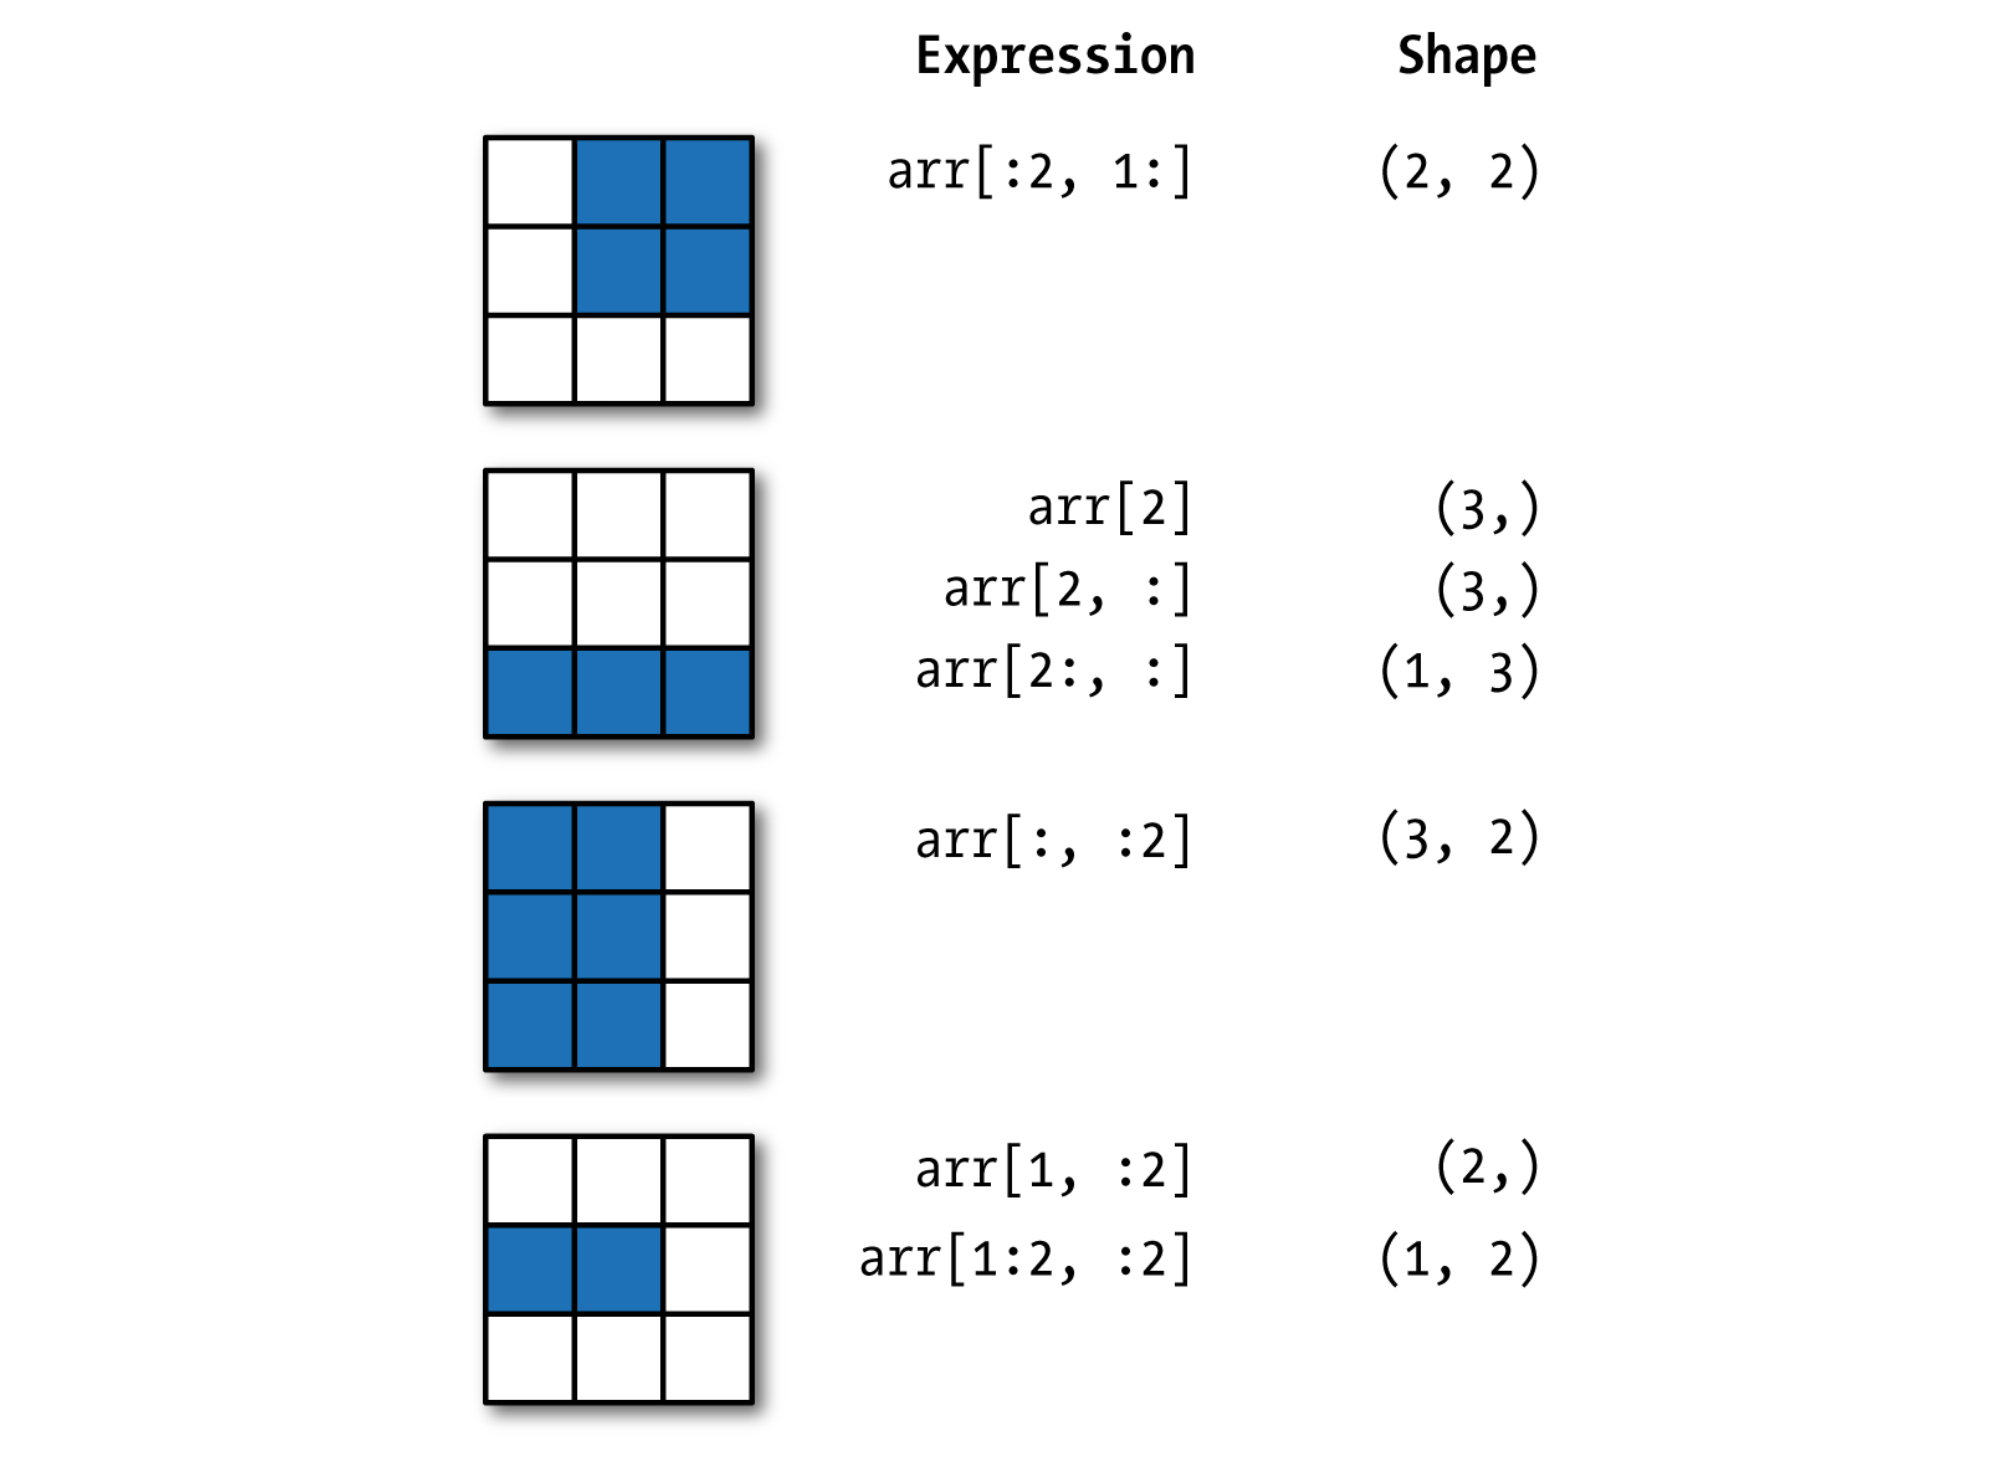

### 4.1.5 Boolean Indexing

**Note**. ```numpy.random```: generates some random normally distributed data. 

In [46]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.0072 -1.2962  0.275   0.2289]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 1.669  -0.4386 -0.5397  0.477 ]
 [ 3.2489 -1.0212 -0.5771  0.1241]
 [ 0.3026  0.5238  0.0009  1.3438]
 [-0.7135 -0.8312 -2.3702 -1.8608]]


Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name **'Bob'**.

In [47]:
print(names == 'Bob')  # comparisons (such as ==) with arrays are also vectorized

[ True False False  True False False False]


In [48]:
print(data[names == 'Bob'])

[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.669  -0.4386 -0.5397  0.477 ]]


**Caveat**. Boolean selection will not fail if the boolean array is not the correct length, so users should be extremely careful when using this feature.

In [49]:
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[ 0.769   1.2464]
 [-0.5397  0.477 ]]
[1.2464 0.477 ]


To select everything but 'Bob', you can either use ```!=``` or negate the condition using ```~```

In [50]:
print(names != 'Bob')
print(data[~(names == 'Bob')])   # negate the condition using ~

[False  True  True False  True  True  True]
[[ 1.0072 -1.2962  0.275   0.2289]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 3.2489 -1.0212 -0.5771  0.1241]
 [ 0.3026  0.5238  0.0009  1.3438]
 [-0.7135 -0.8312 -2.3702 -1.8608]]


In [51]:
cond = (names == 'Bob')
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Selecting several names to combine multiple boolean conditions, use boolean arithmetic operators like ```&``` (and) and ```|``` (or):
 * The Python keywords ```and``` and ```or``` **do NOT work** with boolean arrays.
 * Use ```&``` and ```|```.
 * Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

In [52]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[ 0.0929  0.2817  0.769   1.2464]
 [ 1.3529  0.8864 -2.0016 -0.3718]
 [ 1.669  -0.4386 -0.5397  0.477 ]
 [ 3.2489 -1.0212 -0.5771  0.1241]]


To set all of the negative values in data to 0 we need only do:

In [53]:
data[data < 0] = 0
print(data)

[[0.0929 0.2817 0.769  1.2464]
 [1.0072 0.     0.275  0.2289]
 [1.3529 0.8864 0.     0.    ]
 [1.669  0.     0.     0.477 ]
 [3.2489 0.     0.     0.1241]
 [0.3026 0.5238 0.0009 1.3438]
 [0.     0.     0.     0.    ]]


In [54]:
data[names != 'Joe'] = 7
print(data)

[[7.     7.     7.     7.    ]
 [1.0072 0.     0.275  0.2289]
 [7.     7.     7.     7.    ]
 [7.     7.     7.     7.    ]
 [7.     7.     7.     7.    ]
 [0.3026 0.5238 0.0009 1.3438]
 [0.     0.     0.     0.    ]]


### 4.1.6 Fancy Indexing

***Fancy indexing*** is a term adopted by NumPy to describe indexing using ***integer arrays***.

In [55]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
print(arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


Select out a subset of the rows in a particular order

In [56]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Using negative indices selects rows from the end:

In [57]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [58]:
arr = np.arange(32).reshape((8, 4))
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices:

In [59]:
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])   # Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected.

[ 4 23 29 10]


**Reminder**. Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

### 4.1.7 Transposing Arrays and Swapping Axes

Suppose that $X$ is a 2-D matrix, and $X^\top$ is its transpose, i.e., $X[i,j] = X^\top[j,i]$.  

In [60]:
arr = np.arange(15).reshape((3, 5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


**Matrix product**: Suppose that $X$ and $Y$ are $m \times p$ and $p times n$ matrices. The matrix product, $X Y$ is a $m \times n$ matrix. 
 * The built in arithmatic operation ```*``` $\neq$ matrix product. 
 * We should use ```np.dot``` or ```@```. 

In [61]:
arr = np.random.randn(6, 3)
print(arr)
print('----------------------------')
print(np.dot(arr.T, arr))   # Computing the inner matrix product using np.dot
print('----------------------------')
print(arr.T@arr)    # I prefer this one since it is concise. 

[[-0.8608  0.5601 -1.2659]
 [ 0.1198 -1.0635  0.3329]
 [-2.3594 -0.1995 -1.542 ]
 [-0.9707 -1.307   0.2863]
 [ 0.378  -0.7539  0.3313]
 [ 1.3497  0.0699  0.2467]]
----------------------------
[[ 9.2291  0.9394  4.948 ]
 [ 0.9394  3.7662 -1.3622]
 [ 4.948  -1.3622  4.3437]]
----------------------------
[[ 9.2291  0.9394  4.948 ]
 [ 0.9394  3.7662 -1.3622]
 [ 4.948  -1.3622  4.3437]]


In [62]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print(arr.transpose((1, 0, 2)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


```ndarray``` has the method ```swapaxes```, which takes a pair of axis numbers and switches the indicated axes to rear‐range the data.
 * Note: ```swapaxes``` similarly returns a view on the data without making a copy. 

In [63]:
print(arr)
arr.swapaxes(1, 2)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

---

## 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in ndarrays.
 * Many ufuncs are simple element-wise transformations. 

In [64]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.     1.     1.4142 1.7321 2.     2.2361 2.4495 2.6458 2.8284 3.    ]
[   1.        2.7183    7.3891   20.0855   54.5982  148.4132  403.4288
 1096.6332 2980.958  8103.0839]


In [65]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)
print(np.maximum(x, y))   # calculate the point-wise maximum

[-0.0119  1.0048  1.3272 -0.9193 -1.5491  0.0222  0.7584 -0.6605]
[ 0.8626 -0.01    0.05    0.6702  0.853  -0.9559 -0.0235 -2.3042]
[ 0.8626  1.0048  1.3272  0.6702  0.853   0.0222  0.7584 -0.6605]


In [66]:
arr = np.random.randn(7) * 5
print(arr)
remainder, whole_part = np.modf(arr) # it returns the fractional and integral parts of a floating-point array
print(remainder)
print(whole_part)

[-3.2623 -6.0915 -6.663   5.3731  3.6182  3.45    5.0077]
[-0.2623 -0.0915 -0.663   0.3731  0.6182  0.45    0.0077]
[-3. -6. -6.  5.  3.  3.  5.]


In [67]:
print(arr)
print(np.sqrt(arr))
print(np.sqrt(arr, arr))
print(arr)

[-3.2623 -6.0915 -6.663   5.3731  3.6182  3.45    5.0077]
[   nan    nan    nan 2.318  1.9022 1.8574 2.2378]
[   nan    nan    nan 2.318  1.9022 1.8574 2.2378]
[   nan    nan    nan 2.318  1.9022 1.8574 2.2378]


/tmp/ipykernel_162606/14057974.py:2: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(arr))
/tmp/ipykernel_162606/14057974.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(arr, arr))


---

## 4.3 Array-Oriented Programming

In general, vectorized array operations will often be one or two (or more) orders of magnitude faster than their pure Python equivalents using for loops.

The ```np.meshgrid``` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays.

In [68]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
print(xs)
print(ys)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [69]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

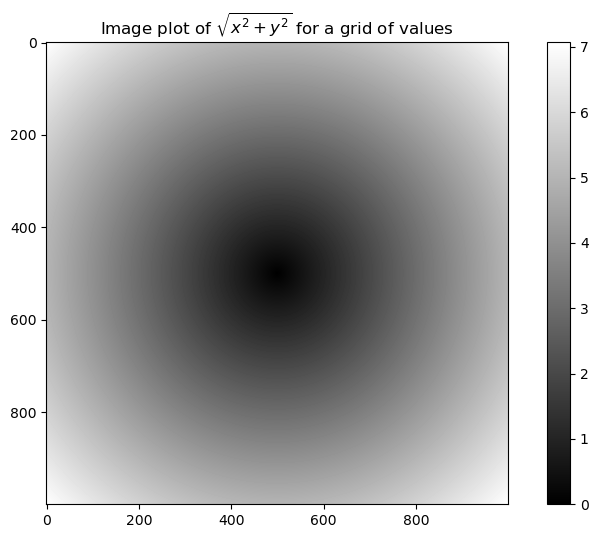

In [70]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Exercise

You are asked to use the Python built-in for loop to get the same output as ```np.sqrt(xs ** 2 + ys ** 2)```. The specification of such a function is given below:
```python
def sum_by_loops(xs, ys):
    """
    xs, ys: 2-D np.array of float numbers. 
    Return a 2-D np.array Z, where Z[i,j] = xs[i,j]**2 + ys[i,j]**2.
    """
```

Use the ```%timeit``` method to compare the run times of ```sum_by_loops(xs, ys)``` and ```np.sqrt(xs ** 2 + ys ** 2)```.

We can use the for loop, but it is much slower. 

In [71]:
def sum_by_loops(xs, ys):
    """
    xs, ys: 2-D np.array of float numbers. 
    Return a 2-D np.array Z, where Z[i,j] = xs[i,j]**2 + ys[i,j]**2.
    """
    
    output = np.empty(xs.shape)
    for i in range(xs.shape[0]):
        for j in range(xs.shape[1]):
            output[i,j] = xs[i,j]**2 + ys[i,j]**2
    return output


In [72]:
%timeit np.sqrt(xs ** 2 + ys ** 2)

1.65 ms ± 7.75 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [73]:
%timeit sum_by_loops(xs, ys)

319 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 4.3.1 Expressing Conditional Logic as Array Operations

The ```numpy.where``` function is a vectorized version of the ternary expression x if con dition else y.
 * The second and third arguments to ```np.where``` don’t need to be arrays; one or both of them can be scalars. 

In [74]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

The ```zip()``` function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

In [75]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]   # A list comprehension 
print(result)

[1.1, 2.2, 1.3, 1.4, 2.5]


In [76]:
result = np.where(cond, xarr, yarr)   # concise and efficient
print(result)

[1.1 2.2 1.3 1.4 2.5]


A typical use of where in data analysis is to produce a new array of values based on another array. 

In [77]:
arr = np.random.randn(4, 4)
print(arr)
print(arr > 0)
print(np.where(arr > 0, 2, -2))

[[-0.5031 -0.6223 -0.9212 -0.7262]
 [ 0.2229  0.0513 -1.1577  0.8167]
 [ 0.4336  1.0107  1.8249 -0.9975]
 [ 0.8506 -0.1316  0.9124  0.1882]]
[[False False False False]
 [ True  True False  True]
 [ True  True  True False]
 [ True False  True  True]]
[[-2 -2 -2 -2]
 [ 2  2 -2  2]
 [ 2  2  2 -2]
 [ 2 -2  2  2]]


In [78]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.5031, -0.6223, -0.9212, -0.7262],
       [ 2.    ,  2.    , -1.1577,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.9975],
       [ 2.    , -0.1316,  2.    ,  2.    ]])

### 4.3.2 Mathematical and Statistical Methods

In [79]:
arr = np.random.randn(5, 4)
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

[[ 2.1695 -0.1149  2.0037  0.0296]
 [ 0.7953  0.1181 -0.7485  0.585 ]
 [ 0.1527 -1.5657 -0.5625 -0.0327]
 [-0.929  -0.4826 -0.0363  1.0954]
 [ 0.9809 -0.5895  1.5817 -0.5287]]
0.19607051119998253
0.19607051119998253
3.9214102239996507


Functions like ```np.mean``` and ```np.sum``` take an optional axis argument that computes the statistic over the given axis, resulting in an array with one fewer dimension:

In [80]:
print(arr.mean(axis=1))
print(arr.sum(axis=0))

[ 1.022   0.1875 -0.502  -0.0881  0.3611]
[ 3.1693 -2.6345  2.2381  1.1486]


In [81]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [82]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### 4.3.3 Methods for Boolean Arrays

In [83]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

42

There are two additional methods, ```any``` and ```all```, useful especially for boolean arrays.
* ```any``` tests whether one or more values in an array is ```True```, while ```all``` checks if every value is ```True```. 
* These methods also work with non-boolean arrays, where non-zero elements evaluate to ```True```.


In [84]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


### 4.3.4 Sorting

In [85]:
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

[ 0.6095 -0.4938  1.24   -0.1357  1.43   -0.8469]
[-0.8469 -0.4938 -0.1357  0.6095  1.24    1.43  ]


In [86]:
arr = np.random.randn(5, 3)
print(arr)
arr.sort(1)   # sort each row
print(arr)

[[ 0.6033  1.2636 -0.2555]
 [-0.4457  0.4684 -0.9616]
 [-1.8245  0.6254  1.0229]
 [ 1.1074  0.0909 -0.3501]
 [ 0.218  -0.8948 -1.7415]]
[[-0.2555  0.6033  1.2636]
 [-0.9616 -0.4457  0.4684]
 [-1.8245  0.6254  1.0229]
 [-0.3501  0.0909  1.1074]
 [-1.7415 -0.8948  0.218 ]]


In [87]:
large_arr = np.random.randn(1000)
large_arr.sort()
print(large_arr[int(0.05 * len(large_arr))])   # 5% quantile
print(np.quantile(large_arr, q=0.05))

-1.5311513550102103
-1.5321795368572282


### 4.3.5 Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. 

A commonly used one is ```np.unique```, which returns the sorted unique values in an array:

In [88]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(np.unique(ints))

['Bob' 'Joe' 'Will']
[1 2 3 4]


In [89]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Another function, ```np.in1d```, tests membership of the values in one array in another, returning a boolean array:

In [90]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])  

array([ True, False, False,  True,  True, False,  True])

---

## 4.4 File Input and Output with Arrays

Arrays are saved by default in an ***uncompressed*** raw binary format with file extension ```.npy```. 

In [91]:
arr = np.arange(10)
np.save('some_array', arr)

In [92]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
np.savez('array_archive.npz', a=arr, b=arr)

In [94]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use ```numpy.savez_compressed``` instead:

In [95]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [96]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

/bin/bash: /home/jiantao/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/jiantao/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/jiantao/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)


---

## 4.5 Linear Algebra

Examples of linear algebra: Matrix multiplication, decompositions, determinants, and other square matrix math.

Unlike some languages like ***MATLAB***, multiplying two two-dimensional arrays with ```*``` is an element-wise product instead of a matrix dot product.

In [97]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
print(x.dot(y))

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


In [98]:
np.dot(x, y)   # x.dot(y) is equivalent to np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [99]:
np.dot(x, np.ones(3))   # results in a one-dimensional array

array([ 6., 15.])

The ```@``` symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication:

In [100]:
x @ np.ones(3)

array([ 6., 15.])

```numpy.linalg``` has a standard set of matrix decompositions and things like inverse and determinant.

In [101]:
from numpy.linalg import inv, qr

In [102]:
X = np.random.randn(5, 5)
mat = X.T.dot(X)

In [103]:
print(inv(mat))   # matrix inverse

[[  933.1189   871.8258 -1417.6902 -1460.4005  1782.1391]
 [  871.8258   815.3929 -1325.9965 -1365.9242  1666.9347]
 [-1417.6902 -1325.9965  2158.4424  2222.0191 -2711.6822]
 [-1460.4005 -1365.9242  2222.0191  2289.0575 -2793.422 ]
 [ 1782.1391  1666.9347 -2711.6822 -2793.422   3409.5128]]


In [104]:
print(mat.dot(inv(mat)))

[[ 1.  0. -0. -0. -0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [-0.  0.  0.  1. -0.]
 [ 0.  0.  0.  0.  1.]]


#### qr factorization of a matrix

In [105]:
q, r = qr(mat)
r

array([[-1.6914,  4.38  ,  0.1757,  0.4075, -0.7838],
       [ 0.    , -2.6436,  0.1939, -3.072 , -1.0702],
       [ 0.    ,  0.    , -0.8138,  1.5414,  0.6155],
       [ 0.    ,  0.    ,  0.    , -2.6445, -2.1669],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0002]])

#### Commonly used ```numpy.linalg``` functions

* ```diag```: Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square matrix with zeros on the off-diagonal
* ```dot```: Matrix multiplication
* ```trace```: Compute the sum of the diagonal elements 
* ```det```: Compute the matrix determinant
* ```eig``` Compute the eigenvalues and eigenvectors of a square matrix 
* ```inv``` Compute the inverse of a square matrix
* ```pinv``` Compute the Moore-Penrose pseudo-inverse of a matrix
* ```qr``` Compute the QR decomposition
* ```svd``` Compute the singular value decomposition (SVD)
* ```solve``` Solve the linear system Ax = b for x, where A is a square matrix lstsq Compute the least-squares solution to Ax = b

---

## 4.6 Pseudorandom Number Generation

The ```numpy.random``` module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions.

Python’s built-in ```random``` module, by contrast, only samples one value at a time.

```numpy.random``` is well over an order of magnitude faster for generating very large samples. 

In [106]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.5732,  0.1933,  0.4429,  1.2796],
       [ 0.575 ,  0.4339, -0.7658, -1.237 ],
       [-0.5367,  1.8545, -0.92  , -0.1082],
       [ 0.1525,  0.9435, -1.0953, -0.144 ]])

In [107]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

351 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.3 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You can change NumPy’s random number generation seed using ```np.random.seed```:

In [108]:
np.random.seed(1234)

The data generation functions in ```numpy.random``` use a ***global*** random seed. To avoid global state, you can use ```numpy.random.RandomState``` to create a random number generator isolated from others.

In [109]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

---

## 4.7 Example: Random Walks

Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

#### Pure Python way using the built-in ```random``` module:

In [110]:
import random
position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

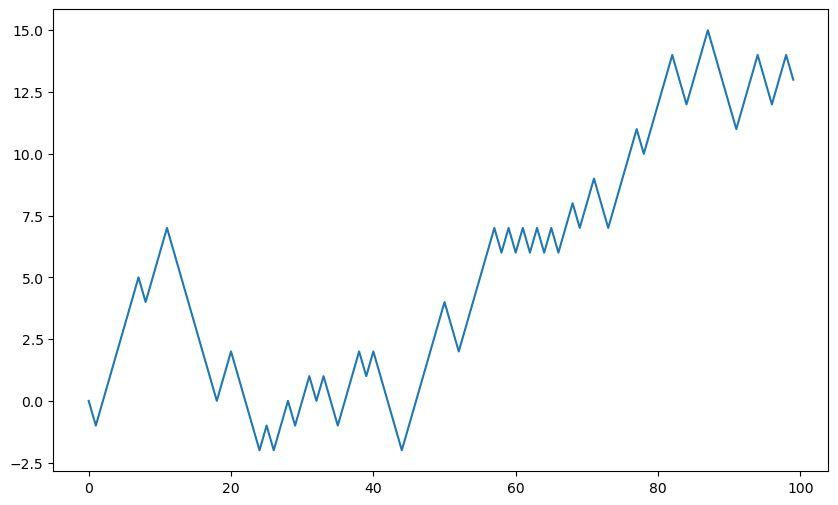

In [111]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(walk[:100])
plt.show()

#### Using ```np.random```

In [112]:
np.random.seed(12345)
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the **minimum** and **maximum** value along the walk’s trajectory:

In [113]:
walk.min()
walk.max()

31

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction.

In [114]:
# first crossing time
(np.abs(walk) >= 10).argmax()   # argmax returns the first index of the maximum value in the boolean array. 

37

### Exercise. Simulating Many Random Walks at Once

Suppose now that we are interested in the probability distribution of the min and max values of the simple random walk process. We also want to know the distribution of the number of steps that we need such that we get at least 10 steps away from the origin 0 in either direction. How do we answer this type of question?

One way is to use Monte-Carlo simulations. That is, we simulate thousands of random walks and calculate the min and max values (and also the number of steps that we need such that we get at least 10 steps away from the origin 0) for each random walk. Finally, we can plot the distribution of these statistics. 

The specification of the function you need to write is as follows:
```python
def random_walk_simulations(nsteps, nwalks):
    """
    nsteps (int): the number of steps in each random walk process;
    nwalks (int): the number of random walks at once;
    Return three quantities:
    1. walks_max: ndarray with shape (nwalks,) that records the max value 
                  across nwalks random walk paths;
    2. walks_min: ndarray with shape (nwalks,) that records the min value 
                  across nwalks random walk paths;
    3. first_crossing_time: ndarray with shape (nwalks,) that records the first 
                            passing time across nwalks random walk paths.
    """
```

In [115]:
def random_walk_simulations(nsteps, nwalks):
    """
    nsteps (int): the number of steps in each random walk process;
    nwalks (int): the number of random walks at once;
    Return three quantities:
    1. walks_max: ndarray with shape (nwalks,) that records the max value across nwalks random walk paths;
    2. walks_min: ndarray with shape (nwalks,) that records the min value across nwalks random walk paths;
    3. first_crossing_time: ndarray with shape (nwalks,) that records the first passing time across 
                            nwalks random walk paths.
    """
    draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
    steps = np.where(draws > 0, 1, -1)
    walks = steps.cumsum(1)

    walks_max = walks.max(axis=1)
    walks_min = walks.min(axis=1)
    first_crossing_time = (np.abs(walks) >= 10).argmax(axis=1)

    return walks_max, walks_min, first_crossing_time


In [116]:
walks_max, walks_min, first_crossing_time = random_walk_simulations(nsteps=1000, nwalks=5000)

In [117]:
print(np.quantile(walks_max, (0.05, 0.5, 0.95)))
print(np.quantile(walks_min, (0.05, 0.5, 0.95)))
print(np.quantile(first_crossing_time, (0.05, 0.5, 0.95)))

[ 1. 21. 62.]
[-62. -21.  -1.]
[ 19.  75. 253.]


---

In [118]:
nwalks = 5000   # simulate 5000 random walks
nsteps = 1000   # each random walk has 1000 steps
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print(walks.shape)
walks

(5000, 1000)


array([[ -1,   0,  -1, ...,  24,  23,  22],
       [ -1,   0,  -1, ..., -36, -37, -36],
       [  1,   2,   3, ..., -42, -41, -40],
       ...,
       [  1,   0,  -1, ...,  48,  49,  50],
       [ -1,  -2,  -3, ..., -38, -39, -40],
       [ -1,   0,   1, ..., -48, -47, -48]])

In [119]:
print(walks.max(axis=1))
print(walks.min(axis=1))
print((np.abs(walks) >= 10).argmax(axis=1))

[33 11  3 ... 50  5 19]
[-15 -42 -43 ... -18 -45 -54]
[227  49  89 ... 171 115  29]


In [120]:
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
hits30.sum() # Number that hit 30 or -30

[ True  True  True ...  True  True  True]


3412

We can use this boolean array to select out the rows of walks that actually cross the absolute 30 level and call argmax across axis 1 to get the crossing times:

In [121]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

497.04103165298943

---

## 4.8 Advanced Array Manipulation

### 4.8.1 Reshaping Arrays

In many cases, you can convert an array from one shape to another without copying any data. To do this, pass a tuple indicating the new shape to the ```reshape``` array instance method.

In [122]:
arr = np.arange(8)
print(arr)

[0 1 2 3 4 5 6 7]


In [123]:
arr.reshape((4, 2), order='C')   # C order, default choice

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [124]:
arr.reshape((4, 2), order='F')   # Fortran order

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

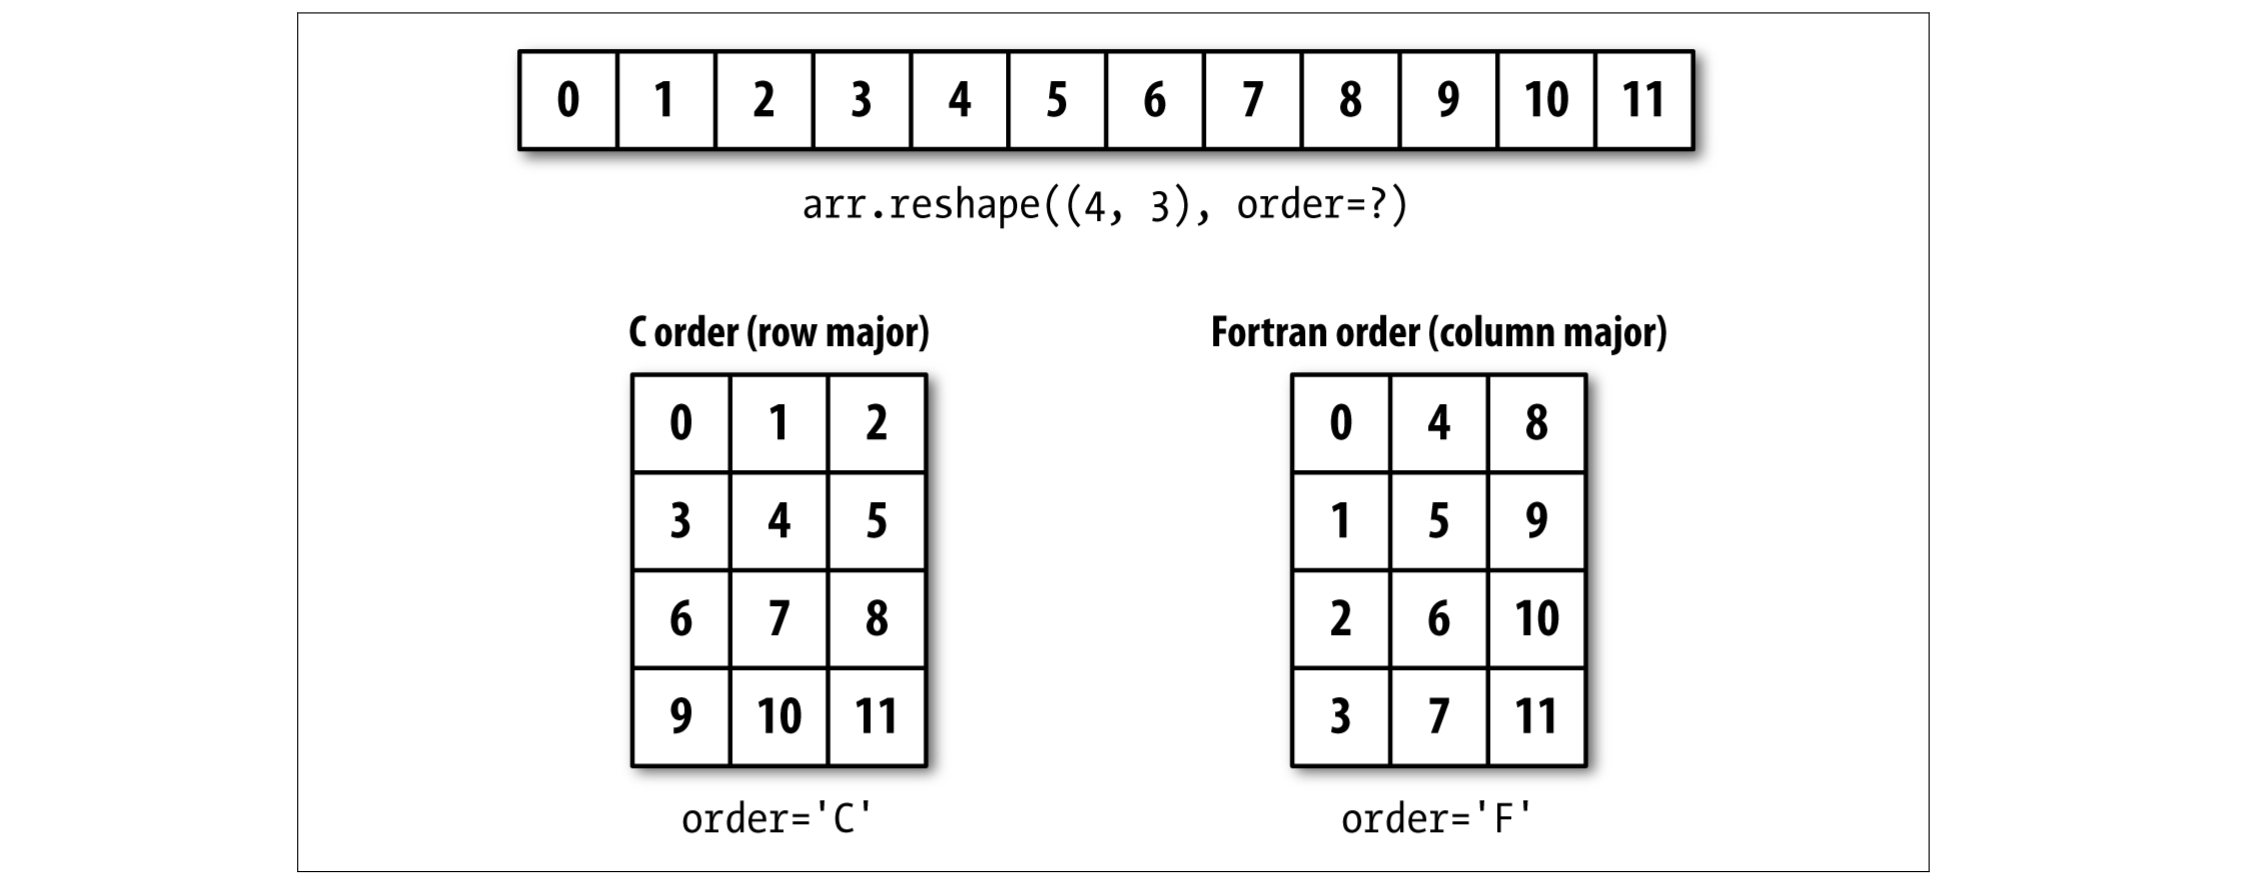

* C/row major order
  * Traverse higher dimensions first (e.g., axis 1 before advancing on axis 0).
* Fortran/column major order
  * Traverse higher dimensions last (e.g., axis 0 before advancing on axis 1).

A ***multidimensional*** array can also be reshaped:

In [125]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

One of the passed shape dimensions can be **–1**, in which case the value used for that dimension will be inferred from the data:

In [126]:
arr = np.arange(15)

In [127]:
arr.reshape((5, -1))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [128]:
arr.reshape((5, 3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

Since an array’s shape attribute is a tuple, it can be passed to ```reshape```, too:

In [129]:
other_arr = np.ones((3, 5))
other_arr.shape

(3, 5)

In [130]:
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

The opposite operation of reshape from one-dimensional to a higher dimension is typically known as **flattening** or **raveling**:
* ```ravel``` does not produce a copy of the underlying values. 
* The ```flatten``` method behaves like ```ravel``` except it always returns a copy of the data:

In [131]:
arr = np.arange(15).reshape((5, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [132]:
arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [133]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 4.8.3 Concatenating and Splitting Arrays

```numpy.concatenate``` takes a sequence (tuple, list, etc.) of arrays and joins them together in order along the input axis:

In [134]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
print(arr1)
print(arr2)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]


In [135]:
np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [136]:
np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

There are some convenience functions, like ```vstack``` (vertical stack) and ```hstack``` (horizontal stack), for common kinds of concatenation. 

In [137]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [138]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

```split```, on the other hand, slices apart an array into multiple arrays along an axis:

In [139]:
arr = np.random.randn(5, 2)
arr

array([[-0.461 ,  0.6532],
       [ 0.1289,  0.0271],
       [-1.8383,  0.5282],
       [ 0.2466,  0.2099],
       [-0.3768, -0.3775]])

In [140]:
first, second, third = np.split(arr, [1, 3])  # The value [1, 3] passed to np.split indicate the indices 
                                              # at which to split the array into pieces.

In [141]:
first

array([[-0.461 ,  0.6532]])

In [142]:
second

array([[ 0.1289,  0.0271],
       [-1.8383,  0.5282]])

In [143]:
third

array([[ 0.2466,  0.2099],
       [-0.3768, -0.3775]])

### 4.8.4 Repeating Elements: ```tile``` and ```repeat```

```repeat``` replicates each element in an array some number of times, producing a larger array.
* By default, if you pass an integer, each element will be repeated that number of times. 
* If you pass an array of integers, each element can be repeated a different number of times:

In [144]:
arr = np.arange(3)
arr

array([0, 1, 2])

In [145]:
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [146]:
arr.repeat([2, 3, 4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

Multidimensional arrays can have their elements repeated **along a particular axis**.

In [147]:
arr = np.random.randn(2, 2)
arr

array([[-1.4518, -0.8257],
       [ 1.4089,  0.409 ]])

In [148]:
arr.repeat(2, axis=0)

array([[-1.4518, -0.8257],
       [-1.4518, -0.8257],
       [ 1.4089,  0.409 ],
       [ 1.4089,  0.409 ]])

* Note that if no axis is passed, the array will be flattened first, which is likely not what you want. 
* Similarly, you can pass an array of integers when repeating a multidimensional array to repeat a given slice a different number of times.

In [149]:
arr.repeat([2, 3], axis=0)

array([[-1.4518, -0.8257],
       [-1.4518, -0.8257],
       [ 1.4089,  0.409 ],
       [ 1.4089,  0.409 ],
       [ 1.4089,  0.409 ]])

In [150]:
arr.repeat([2, 3], axis=1)

array([[-1.4518, -1.4518, -0.8257, -0.8257, -0.8257],
       [ 1.4089,  1.4089,  0.409 ,  0.409 ,  0.409 ]])

```tile```, on the other hand, is a shortcut for stacking copies of an array along an axis.

In [151]:
arr

array([[-1.4518, -0.8257],
       [ 1.4089,  0.409 ]])

In [152]:
np.tile(arr, 2)

array([[-1.4518, -0.8257, -1.4518, -0.8257],
       [ 1.4089,  0.409 ,  1.4089,  0.409 ]])

* The second argument is the number of tiles; with a scalar, the tiling is made ***row by row***, rather than ***column by column***. 
* The second argument to tile can be a tuple indicating the layout of the “tiling”, for example, 

In [153]:
np.tile(arr, (2, 1))

array([[-1.4518, -0.8257],
       [ 1.4089,  0.409 ],
       [-1.4518, -0.8257],
       [ 1.4089,  0.409 ]])

In [154]:
np.tile(arr, (3, 2))

array([[-1.4518, -0.8257, -1.4518, -0.8257],
       [ 1.4089,  0.409 ,  1.4089,  0.409 ],
       [-1.4518, -0.8257, -1.4518, -0.8257],
       [ 1.4089,  0.409 ,  1.4089,  0.409 ],
       [-1.4518, -0.8257, -1.4518, -0.8257],
       [ 1.4089,  0.409 ,  1.4089,  0.409 ]])

---

## 4.9 Broadcasting

* **Broadcasting** describes how arithmetic works between arrays of different shapes. 

* It can be a powerful feature, but one that can cause confusion, even for experienced users. 

In [155]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [156]:
arr * 4   # Here we say that the scalar value 4 has been broadcast to all of the other elements in
          # the multiplication operation.

array([ 0,  4,  8, 12, 16])

Suppose we want to demean each column of an array by subtracting the column means. 

In [157]:
arr = np.random.randn(4, 3)
print(arr.mean(axis=0))

[-0.8392 -0.0882 -0.816 ]


In [158]:
demeaned = arr - arr.mean(0)
print(demeaned)
print(demeaned.mean(0))

[[ 0.346  -0.6403  0.0872]
 [ 1.6652  0.7085 -1.204 ]
 [-0.8848  0.6308  0.5226]
 [-1.1264 -0.6991  0.5943]]
[ 0.  0. -0.]


### The Broadcasting Rule

Two arrays are compatible for broadcasting if for each trailing dimension (i.e., starting from the end) the axis lengths match or if either of the lengths is 1. Broadcasting is then performed over the missing or length 1 dimensions.

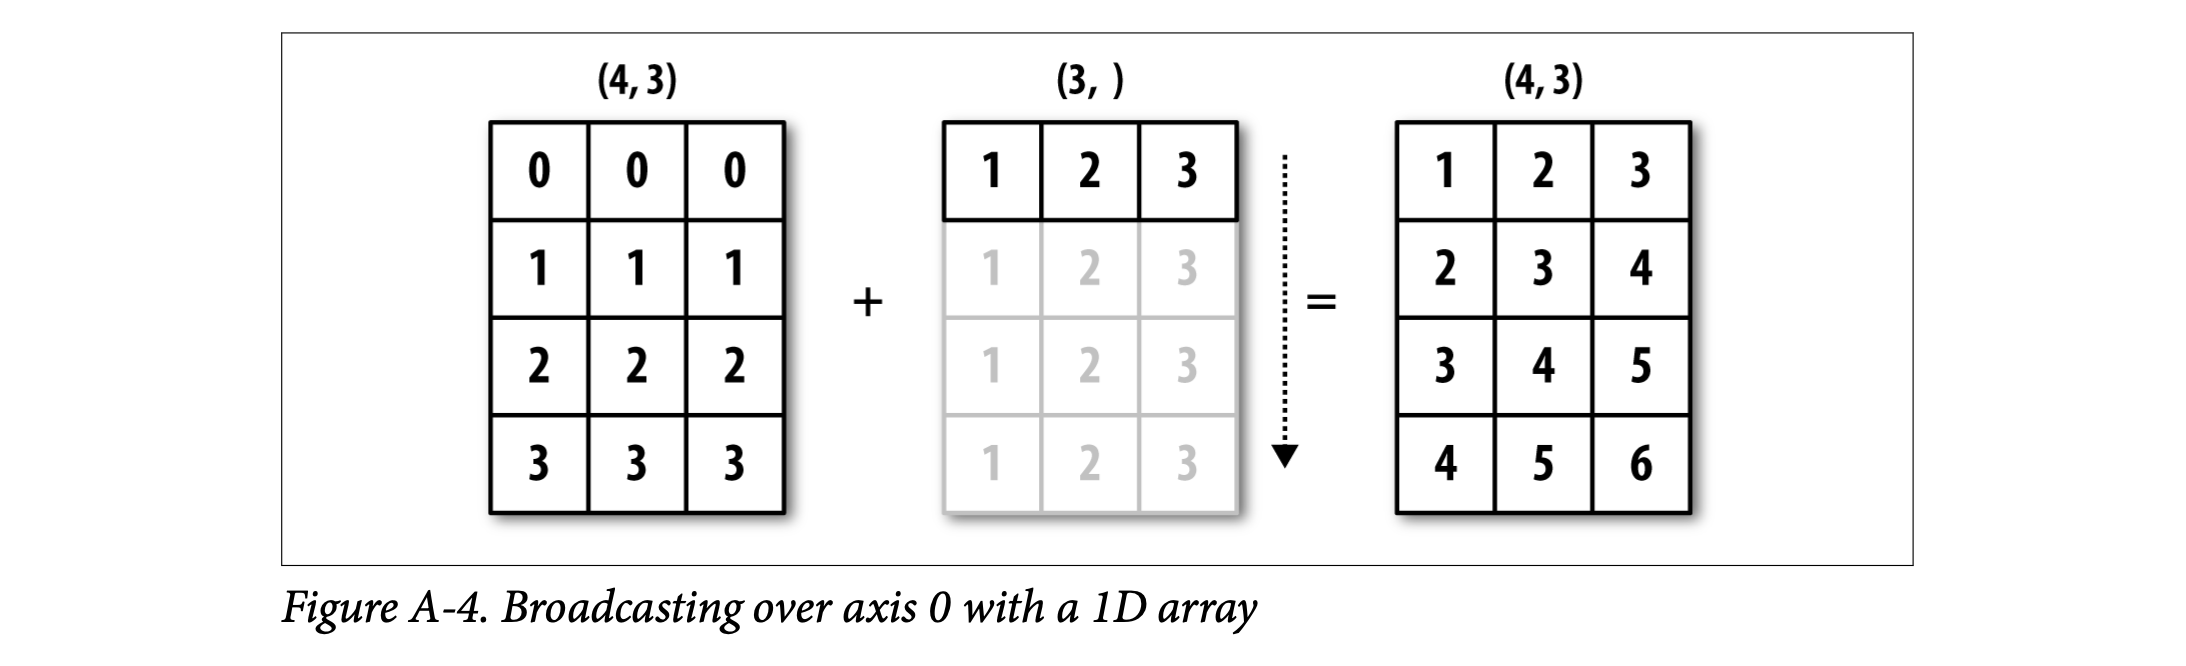

### Exercise

How do we demean each row such that the row means are zeros? 

In [159]:
arr

array([[-0.4932, -0.7285, -0.7288],
       [ 0.8259,  0.6203, -2.02  ],
       [-1.724 ,  0.5426, -0.2934],
       [-1.9657, -0.7873, -0.2217]])

In [160]:
row_means = arr.mean(1)
print(row_means.shape)

(4,)


In [161]:
demeaned = arr - row_means.reshape((4, 1))
print(demeaned.mean(1))

[ 0.  0.  0. -0.]


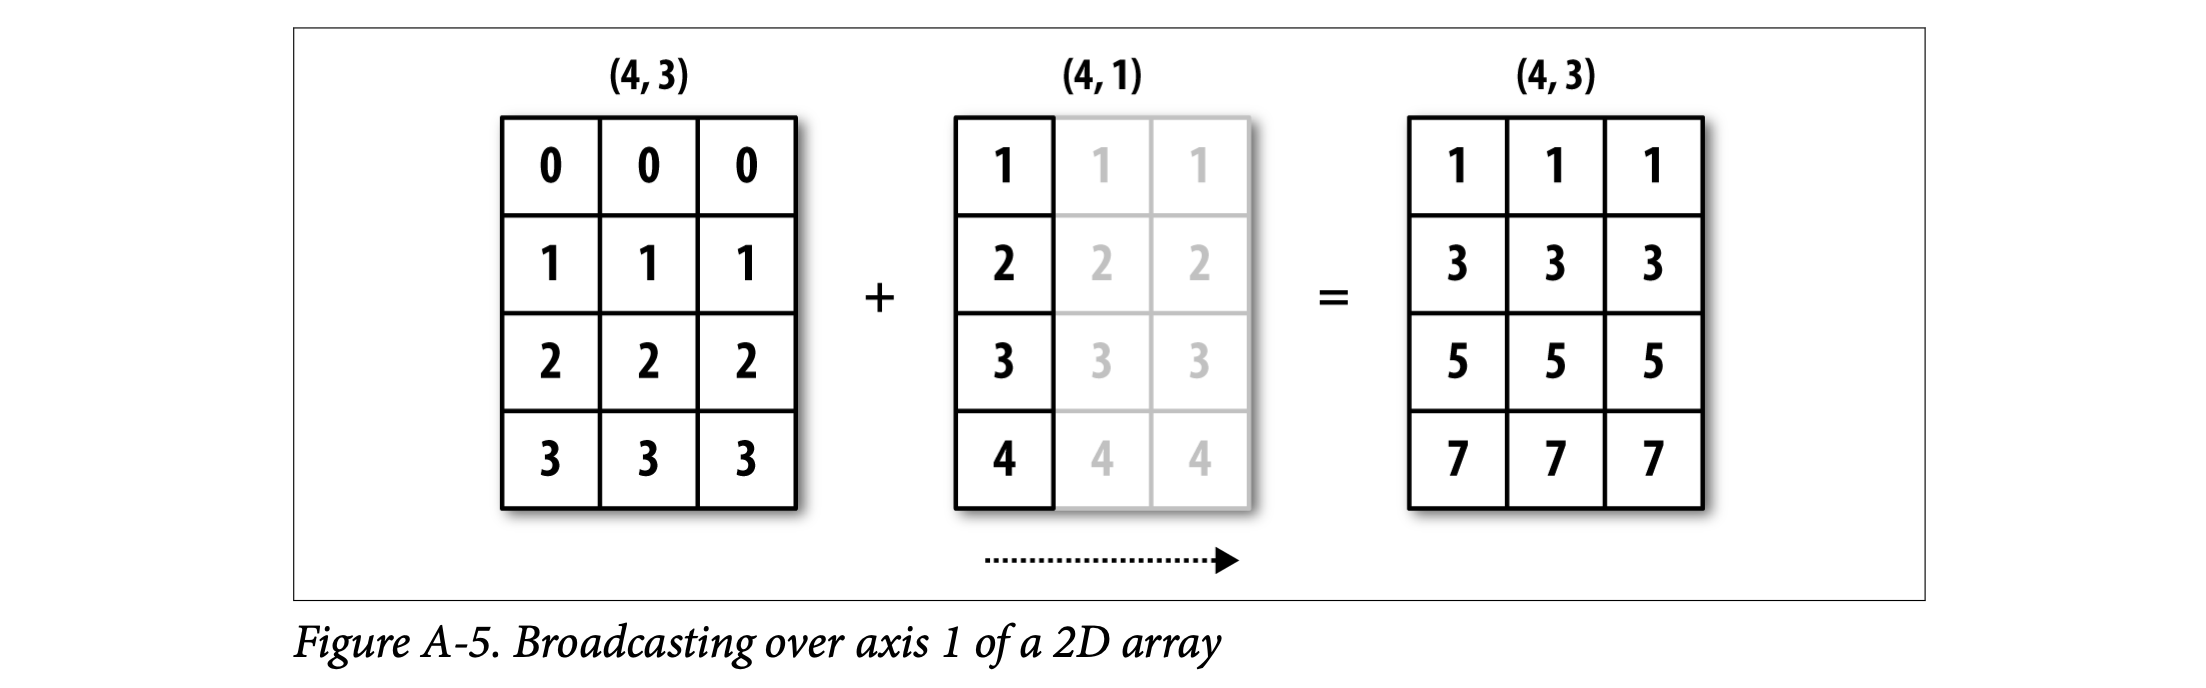

---

## END